# Insurance Company data analysis and classification 

Load the dataset and get a glimpse of the data

In [1]:
import pandas as pd

data_location = '/home/orestis/Desktop/InsuranceProject/insurance.csv'
df = pd.read_csv(data_location)

del df['id']

df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Check if there are missing values

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


See the value counts of Vehicle Age to get an idea of how to transform it

In [3]:
df["Vehicle_Age"].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

Transform the column 'Vehicle Age' to float numbers.We will replace 1-2 Year to 1.5 year,< 1 to 0.5 and > 2 to 2.5

In [4]:
vehicle_age_dict = {"1-2 Year": 1.5,"< 1 Year": 0.5,"> 2 Years": 2.5}
vehicles_age = [vehicle_age_dict[x] for x in df["Vehicle_Age"].values]

In [5]:
df["Vehicle_Age"] = vehicles_age
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,2.5,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1.5,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,2.5,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,0.5,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,0.5,No,27496.0,152.0,39,0


We have to do the same for the columns Gender and Vehile_Damage

In [6]:
df["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [7]:
df["Vehicle_Damage"].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [8]:
gender_dict = {"Male":0,"Female":1}
damage_dict = {"Yes":1,"No":0}

genders = [gender_dict[x] for x in df["Gender"].values]
vehicles_damage = [damage_dict[x] for x in df["Vehicle_Damage"].values]

In [9]:
df["Gender"] = genders
df["Vehicle_Damage"] = vehicles_damage
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2.5,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1.5,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2.5,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0.5,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0.5,0,27496.0,152.0,39,0


Show a summary of the numerical attributes

In [10]:
df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,0.459239,38.822584,0.997869,26.388807,0.458210,1.109616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,0.000000,20.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,0.000000,25.000000,1.000000,15.000000,0.000000,0.500000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,0.000000,36.000000,1.000000,28.000000,0.000000,1.500000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,1.000000,49.000000,1.000000,35.000000,1.000000,1.500000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,1.000000,85.000000,1.000000,52.000000,1.000000,2.500000,1.000000,540165.000000,163.000000,299.000000,1.000000


Plot a histogram for each numerical attribute to get another look at the data

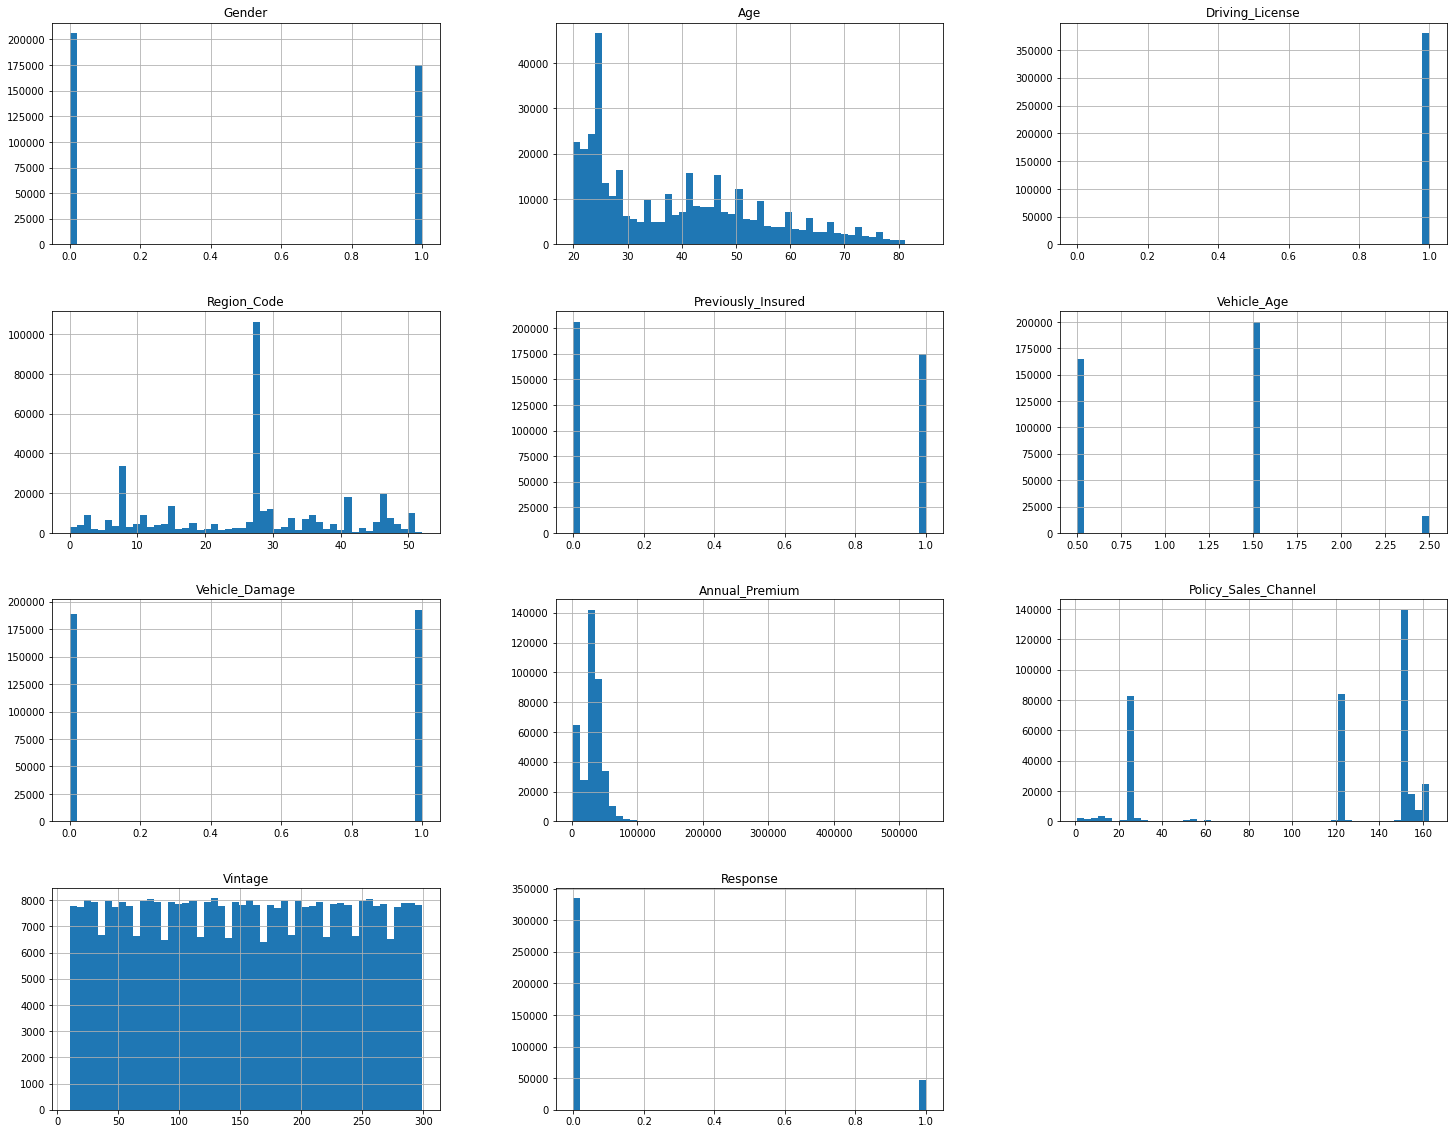

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(25,20))
plt.show()

We can see that most of the responses are negative,the majority of ages are around 25 and that most of vehicles are less or equal to 2 years.

Looking for correlations

In [12]:
corr_matrix = df.corr()

Now let's look at how much ech attribure correlates with response value

In [13]:
corr_matrix['Response'].sort_values(ascending=False)

Response                1.000000
Vehicle_Damage          0.354400
Vehicle_Age             0.221874
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
Gender                 -0.052440
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

We can see that the response has a positive correlation(not very strong) with Vehicle Damage and Vehicle Age.There is also a negative correlation with Previously_Insured.Also there is almost no linear correlation with Region code,Driving license,Vintage and Gender

Split the data to test and training set

In [14]:
from sklearn.model_selection import train_test_split

#train_set,test_set = train_test_split(df,test_size=0.2,random_state=42)

df.head()

y = df["Response"]
del df["Response"]

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=27)

In [15]:
X_train[:5]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
212636,1,22,1,27.0,0,0.5,1,2630.0,160.0,217
310363,0,23,1,41.0,1,0.5,0,36436.0,152.0,275
21162,1,31,1,21.0,1,0.5,0,35533.0,152.0,70
141878,1,34,1,7.0,0,1.5,1,2630.0,152.0,155
22331,0,65,1,28.0,0,1.5,1,38271.0,26.0,278


In [16]:
y_train[:100]

212636    0
310363    0
21162     0
141878    1
22331     0
         ..
109107    0
114208    0
85441     0
320792    0
114308    0
Name: Response, Length: 100, dtype: int64

Feature Scaling and Normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler

#Create copies of the datasets
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

#apply standarization on numerical features
cols = ['Age','Region_Code','Vehicle_Age' ,'Annual_Premium' ,'Policy_Sales_Channel' ,'Vintage']

for col_name in cols:
    #fit on training data column
    norm = MinMaxScaler().fit(X_train_norm[[col_name]])
    
    #transform the training data column
    X_train_norm[col_name] = norm.transform(X_train_norm[[col_name]])
    
    #transform the testing data column
    X_test_norm[col_name] = norm.transform(X_test_norm[[col_name]])

In [18]:
X_train_norm[:5]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
212636,1,0.030769,1,0.519231,0,0.0,1,0.000000,0.981481,0.716263
310363,0,0.046154,1,0.788462,1,0.0,0,0.062891,0.932099,0.916955
21162,1,0.169231,1,0.403846,1,0.0,0,0.061211,0.932099,0.207612
141878,1,0.215385,1,0.134615,0,0.5,1,0.000000,0.932099,0.501730
22331,0,0.692308,1,0.538462,0,0.5,1,0.066305,0.154321,0.927336


In [19]:
X_test_norm[:5]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
214232,1,0.030769,1,0.538462,1,0.0,0,0.047630,0.932099,0.166090
202776,0,0.261538,1,0.538462,0,0.5,1,0.084140,0.154321,0.719723
65147,0,0.692308,1,0.153846,0,0.5,1,0.000000,0.981481,0.889273
163311,1,0.107692,1,0.153846,1,0.0,0,0.050315,0.925926,0.726644
204606,1,0.138462,1,0.230769,1,0.0,0,0.054953,0.932099,0.069204


In [20]:
#standardization
from sklearn.preprocessing import StandardScaler

#Create copies of the datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

#apply standarization on numerical features
cols = ['Age','Region_Code','Vehicle_Age' ,'Annual_Premium' ,'Policy_Sales_Channel' ,'Vintage']

for col_name in cols:
    #fit on training data column
    scale = StandardScaler().fit(X_train_stand[[col_name]])
    
    #transform the training data column
    X_train_stand[col_name] = scale.transform(X_train_stand[[col_name]])
    
    #transform the testing data column
    X_test_stand[col_name] = scale.transform(X_test_stand[[col_name]])

In [21]:
X_train_stand[0:5]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
212636,1,-1.085382,1,0.047081,0,-1.075199,1,-1.619408,0.885587,0.748076
310363,0,-1.020957,1,1.105413,1,-1.075199,0,0.340890,0.738084,1.440888
21162,1,-0.505551,1,-0.406491,1,-1.075199,0,0.288528,0.738084,-1.007844
141878,1,-0.312274,1,-1.464823,0,0.686485,1,-1.619408,0.738084,0.007484
22331,0,1.684922,1,0.122676,0,0.686485,1,0.447295,-1.585077,1.476723


In [22]:
X_test_stand[:5]

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
214232,1,-1.085382,1,0.122676,1,-1.075199,0,-0.134775,0.738084,-1.151185
202776,0,-0.118997,1,0.122676,0,0.686485,1,1.003213,-1.585077,0.760021
65147,0,1.684922,1,-1.389228,0,0.686485,1,-1.619408,0.885587,1.345327
163311,1,-0.763254,1,-1.389228,1,-1.075199,0,-0.051100,0.719647,0.783911
204606,1,-0.634402,1,-1.086847,1,-1.075199,0,0.093460,0.738084,-1.485645


Applying Scaling to Machine Learning Algorithms

K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsRegressor
#measuring RMSE score
from sklearn.metrics import mean_squared_error
import numpy as np

knn = KNeighborsRegressor(n_neighbors=5)

rmse = []

trainX = [X_train, X_train_norm, X_train_stand]
testX = [X_test, X_test_norm, X_test_stand]

# model fitting and measuring RMSE
for i in range(len(trainX)):
    
    # fit
    knn.fit(trainX[i],y_train)
    # predict
    pred = knn.predict(testX[i])
    # RMSE
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

# visualizing the result
df_knn = pd.DataFrame({'RMSE':rmse},index=['Original','Normalized','Standardized'])
df_knn

,RMSE
Original,0.349017
Normalized,0.323230
Standardized,0.324342


Calculate accuracy as well

Text(0, 0.5, 'Testing Accuracy')

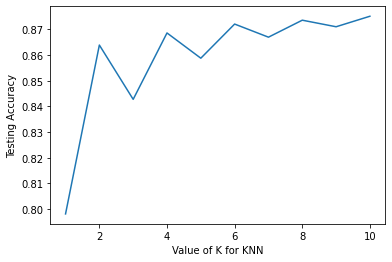

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# try K=1 through K=10 and record testing accuracy
k_range = list(range(1, 11))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

We can see that for k>=10 we get the best accuracy.Try the results with normalized and standarized data

In [25]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_norm, y_train)
y_pred = knn.predict(X_test_norm)
print('Normalized dataset score')
print(accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_stand, y_train)
y_pred = knn.predict(X_test_stand)
print('Standarized dataset score')
print(accuracy_score(y_test, y_pred))


Normalized dataset score
0.8716512293038755
Standarized dataset score
0.8718480228805332


Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

logreg.fit(X_train_norm, y_train)
y_pred = logreg.predict(X_test_norm)
print('Normalized dataset score')
print(accuracy_score(y_test, y_pred))

logreg = LogisticRegression()

logreg.fit(X_train_stand, y_train)
y_pred = logreg.predict(X_test_stand)
print('Standarized dataset score')
print(accuracy_score(y_test, y_pred))

Normalized dataset score
0.8770696124478498
Standarized dataset score
0.8770696124478498


Random Forest

Text(0, 0.5, 'Testing Accuracy')

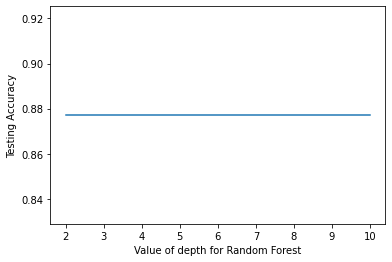

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Find the depth with the best accuracy
depth_range = list(range(2, 11))
scores = []
for depth in depth_range:
    clf = RandomForestClassifier(max_depth=depth, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(depth_range, scores)
plt.xlabel('Value of depth for Random Forest')
plt.ylabel('Testing Accuracy')

We can see that the score is the same for depths between 2 and 10